<a href="https://colab.research.google.com/github/1kaiser/Snow-cover-area-estimation/blob/main/OpenAltimetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OpenAltimetry ICESat-2: Elevation Workflow
Overview


This notebook pulls data from ICESat-2 surface-specific products - ATL06, ATL07, ATL08, ATL10, ATL12, ATL13 via the OpenAltimetry API.


Instructions
Replace the "OA_API_URL" string with the data copied from : "Copy API URL" from the OpenAltimetry elevation chart and start visualizing your data!
Author: Minh Phan - mnphan@ucsd.edu. Based off the work of Luis Lopez - luis.lopez@nsidc.org

#**ALT06 LAND ICE ELEVATION**

In [ ]:
import json
import requests

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447


OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

print(OA_API_URL)

r = requests.get(OA_API_URL)
data = r.json()


In [ ]:
data

[dates and track id google sheet](https://docs.google.com/spreadsheets/d/13sjRCD2E2oyjkJwXOxeu5P3V6Ql9nW0KZe1gnsPFNOM/edit?usp=sharing)

In [ ]:
a = [["2021-11-04",653],
["2021-11-08",714],
["2021-11-19",889],
["2021-11-23",950],
["2021-11-27",1011],
["2021-11-29",1034],
["2021-12-03",1095],
["2021-12-07",1156],
["2021-12-18",1331],
["2021-12-22",5],
["2021-12-26",66],
["2021-12-28",89],]

In [ ]:
len(a)

In [ ]:
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  



filepath = Path('2021PW.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447

# We populate a list with the elevation data using the OpenAltimetry API
OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

OA_BEAMS = ['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']

df_beams = []
oa_plots = []
complete_dataset = []
# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
  OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl06?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
  OA_API_URL += '&client=jupyter';
  b.append(getData(OA_API_URL))

for elevation_data in b:
  product = elevation_data["product"]

  print('Reading data product: ' + product)

  for series_beam in elevation_data['series']:
      if any(word in series_beam['beam'] for word in OA_BEAMS):
          series = []
          
          data_name = 'lat_lon_elev'
          if product == 'ATL08':
              data_name = 'lat_lon_elev_canopy'

          for p in series_beam[data_name]:
              series.append({
                  'lat': p[0],
                  'lon': p[1],
                  'h': p[2]
              })
              
          print ('beam ' + series_beam['beam'] + ' - len = ' + str(len(series)))

          if (len(series) > 0):
              df = pd.DataFrame.from_dict(series)
              df.name = series_beam['beam']
              df_beams.append(df)


 
              
  print('df_beams len: ' + str(len(df_beams)))

# <<<<SAVING TO .csv FILE>>>>
pd.concat(df_beams).to_csv(filepath)

for df in df_beams:
    oa_plots.append(go.Scatter3d(name=df.name, x=df['lat'], y=df['lon'], z=df['h'],
                                    marker=dict(
                                        size=2,
                                        color=df['h'],
                                        colorscale='Viridis',   # choose a colorscale
                                        opacity=0.8
                                    ),
                                    line=dict(
                                        color='darkblue',
                                        width=2
                                    )
                                )
                   )

layout = go.Layout(
    width=1200,
    height=600,
    scene = dict(aspectmode = 'manual', aspectratio =dict(x=1, y=1, z=0.5),
                 xaxis=dict(title='Latitude'), yaxis=dict(title='Longitude'), zaxis=dict(title='Elevation (m)'))
)

print('Plotting...')

fig = go.Figure(data=oa_plots, layout=layout)

iplot(fig)


In [ ]:
pd.concat(df_beams)


https://openaltimetry.org

In [ ]:
a = !curl -X GET "https://openaltimetry.org/data/api/icesat2/atl06?date=2019-10-26&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&trackId=447&client=portal&outputFormat=json" -H "accept: */*"

In [ ]:
a

In [ ]:
!wget https://openaltimetry.org/data/api/icesat2/getTracks?date=2019-10-26&minx=75.979728&miny=31.453599&maxx=77.866667&maxy=32.416667&outputFormat=json -O a.json


**VISUALIZATION**

In [92]:
a = np.asarray([[	"	A	"	,	"	10/23/2018	"	,	]	,
[	"	B	"	,	"	10/27/2018	"	,	]	,
[	"	C	"	,	"	11/6/2018	"	,	]	,
[	"	D	"	,	"	11/10/2018	"	,	]	,
[	"	E	"	,	"	11/14/2018	"	,	]	,
[	"	F	"	,	"	11/25/2018	"	,	]	,
[	"	G	"	,	"	11/29/2018	"	,	]	,
[	"	H	"	,	"	12/3/2018	"	,	]	,
[	"	I	"	,	"	12/5/2018	"	,	]	,
[	"	J	"	,	"	12/13/2018	"	,	]	,
[	"	K	"	,	"	12/24/2018	"	,	]	,
[	"	L	"	,	"	12/28/2018	"	,	]	,
[	"	M	"	,	"	1/1/2019	"	,	]	,
[	"	N	"	,	"	1/3/2019	"	,	]	])

In [93]:
from numpy.core.fromnumeric import transpose
a = transpose(a)
a.shape

(2, 14)

In [82]:
b = np.ones((4,10))+np.ones((4,10))
b.shape
b

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

TypeError: ignored

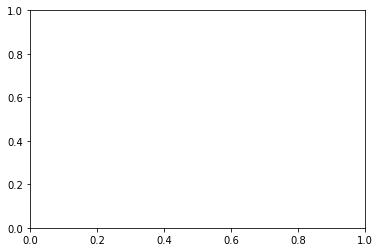

In [96]:
import matplotlib.pyplot as plt
import numpy as np

data1 = a

colors1 = ['C{}'.format(i) for i in range(4)]

lineoffsets1 = [-4, -3]
linelengths1 = [1, 2 ]

plt.eventplot(data1, colors=colors1, lineoffsets=lineoffsets1, linelengths=linelengths1)
plt.title('Event Plot')
plt.xlabel('Time(s)')
plt.ylabel('Signal')

#**ALT08 GROUND AND CANOPY HEIGHT**

In [ ]:
import json
import requests

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447


OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl08?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

print(OA_API_URL)

r = requests.get(OA_API_URL)
data = r.json()


In [ ]:
data

In [ ]:
a = [["2022-07-01",150],
["2022-07-05",211],
["2022-07-17",386],
["2022-07-30",592],
["2022-08-03",653],
["2022-08-07",714],
["2022-08-19",889],
["2022-08-23",950],
["2022-08-27",1011],
["2022-09-21",5],
["2022-09-25",66],
["2022-09-26",89],
["2022-09-30",150],
["2022-10-04",211],]

In [ ]:
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  

filepath = Path('ALT08_2022_MS.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 75.979728
right  = 77.866667
bottom = 31.453599
top    = 32.416667

date = '2019-10-26'
trackid = 447

# We populate a list with the elevation data using the OpenAltimetry API
OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl08?date='+date+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(trackid)+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

OA_API_URL += '&client=jupyter';

OA_BEAMS = ['gt1r', 'gt1l', 'gt2r', 'gt2l', 'gt3r', 'gt3l']

df_beams = []
oa_plots = []
complete_dataset = []
# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
  OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl08?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'
  OA_API_URL += '&client=jupyter';
  b.append(getData(OA_API_URL))

for elevation_data in b:
  product = elevation_data["product"]

  print('Reading data product: ' + product)

  for series_beam in elevation_data['series']:
      if any(word in series_beam['beam'] for word in OA_BEAMS):
          series = []
          
          data_name = 'lat_lon_elev'
          if product == 'ATL08':
              data_name = 'lat_lon_elev_canopy'

          for p in series_beam[data_name]:
              series.append({
                  'lat': p[0],
                  'lon': p[1],
                  'h': p[2],
                  'Canopy': p[3]
              })
              
          print ('beam ' + series_beam['beam'] + ' - len = ' + str(len(series)))

          if (len(series) > 0):
              df = pd.DataFrame.from_dict(series)
              df.name = series_beam['beam']
              df_beams.append(df)


 
              
  print('df_beams len: ' + str(len(df_beams)))

# <<<<SAVING TO .csv FILE>>>>
pd.concat(df_beams).to_csv(filepath)

for df in df_beams:
    oa_plots.append(go.Scatter3d(name=df.name, x=df['lat'], y=df['lon'], z=df['h'],
                                    marker=dict(
                                        size=2,
                                        color=df['h'],
                                        colorscale='Viridis',   # choose a colorscale
                                        opacity=0.8
                                    ),
                                    line=dict(
                                        color='darkblue',
                                        width=2
                                    )
                                )
                   )

layout = go.Layout(
    width=1200,
    height=600,
    scene = dict(aspectmode = 'manual', aspectratio =dict(x=1, y=1, z=0.5),
                 xaxis=dict(title='Latitude'), yaxis=dict(title='Longitude'), zaxis=dict(title='Elevation (m)'))
)

print('Plotting...')

fig = go.Figure(data=oa_plots, layout=layout)

iplot(fig)
